In [115]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

# Presidential Election

In [116]:
elections = pd.read_csv('election_2000-2020.csv')

In [117]:
elections.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL


In [118]:
county_state_party_cnt = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int))))

for index, rows in elections.iterrows():
    yr = rows['year']
    st = rows['state']
    ct = rows['county_name']
    pt = rows['party']
    votes = rows['candidatevotes']
    
    county_state_party_cnt[yr][st][ct][pt] += votes
    county_state_party_cnt[yr][st][ct]['TOTAL'] += votes
    
county_state_party_cnt[2020]['TEXAS']['TRAVIS']

defaultdict(int,
            {'DEMOCRAT': 435860,
             'TOTAL': 608575,
             'GREEN': 2094,
             'LIBERTARIAN': 8905,
             'OTHER': 379,
             'REPUBLICAN': 161337})

In [132]:
for index, rows in elections.iterrows():
    if rows['county_name'] == 'HAMPTON' and rows['state'] == 'VIRGINIA':
        print(rows['party'], rows['candidatevotes'], rows['year'])

DEMOCRAT 27490 2000
REPUBLICAN 19561 2000
GREEN 563 2000
OTHER 273 2000
DEMOCRAT 32016 2004
REPUBLICAN 23399 2004
OTHER 326 2004
DEMOCRAT 46917 2008
REPUBLICAN 20476 2008
OTHER 550 2008
DEMOCRAT 46966 2012
REPUBLICAN 18640 2012
OTHER 884 2012
DEMOCRAT 41312 2016
REPUBLICAN 17902 2016
OTHER 3142 2016


In [129]:
county_state_per = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

years = np.arange(2000, 2021, 4)

for yr in years:
    for st in county_state_party_cnt[yr].keys():
        for ct in county_state_party_cnt[yr][st].keys():
            county_state_per[st][ct][f'per_dem_{yr}'] = county_state_party_cnt[yr][st][ct]['DEMOCRAT'] / (float(county_state_party_cnt[yr][st][ct]['TOTAL']) + 0.00001)
            county_state_per[st][ct][f'per_gop_{yr}'] = county_state_party_cnt[yr][st][ct]['REPUBLICAN'] / (float(county_state_party_cnt[yr][st][ct]['TOTAL']) + 0.00001)

county_state_per['VIRGINIA']['HAMPTON']

defaultdict(float,
            {'per_dem_2000': 0.574059765578537,
             'per_gop_2000': 0.4084824690608135,
             'per_dem_2004': 0.574370750332005,
             'per_gop_2004': 0.41978077170847655,
             'per_dem_2008': 0.6905347128194906,
             'per_gop_2008': 0.30137026620823776,
             'per_dem_2012': 0.7063618588199184,
             'per_gop_2012': 0.2803429086659132,
             'per_dem_2016': 0.6625184423852526,
             'per_gop_2016': 0.2870934632934932})

In [121]:
columns = ['State', 'County']
for yr in years:
    columns.append(f'per_dem_{yr}')
    columns.append(f'per_gop_{yr}')
    
elections_per = pd.DataFrame(columns = columns)

ix = 0

for st in county_state_per.keys():
    for ct in county_state_per[st].keys():
        dct = {'State': st, 'County': ct}
        for col in county_state_per[st][ct].keys():
            dct[col] = county_state_per[st][ct][col]
            
        elections_per.loc[ix] = dct
        ix+=1
    
elections_per

,State,County,per_dem_2000,per_gop_2000,per_dem_2004,per_gop_2004,per_dem_2008,per_gop_2008,per_dem_2012,per_gop_2012,per_dem_2016,per_gop_2016,per_dem_2020,per_gop_2020
0,ALABAMA,AUTAUGA,0.287192,0.696943,0.236940,0.756735,0.257730,0.736136,0.265878,0.726183,0.237697,0.727666,0.270184,0.714368
1,ALABAMA,BALDWIN,0.247822,0.723654,0.225029,0.764152,0.238119,0.752595,0.215894,0.773583,0.193856,0.765457,0.224090,0.761714
2,ALABAMA,BARBOUR,0.499086,0.490236,0.448362,0.547369,0.489854,0.504385,0.513685,0.482231,0.465278,0.520967,0.457882,0.534512
3,ALABAMA,BIBB,0.381636,0.601746,0.274868,0.720000,0.265965,0.724433,0.261520,0.728266,0.212496,0.764032,0.206983,0.784263
4,ALABAMA,BLOUNT,0.276915,0.704779,0.183129,0.808501,0.145135,0.840195,0.123719,0.864659,0.084258,0.893348,0.095694,0.895716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,ALASKA,DISTRICT 37,0.362172,0.541965,0.378264,0.584869,0.400429,0.570418,0.606920,0.349942,0.478269,0.382853,0.497861,0.458576
3189,ALASKA,DISTRICT 38,0.404944,0.495780,0.466207,0.484532,0.528838,0.426556,0.601849,0.331523,0.541315,0.224338,0.604265,0.327798
3190,ALASKA,DISTRICT 39,0.439861,0.447379,0.424749,0.517421,0.519869,0.448110,0.555640,0.391159,0.557191,0.249158,0.607707,0.329146
3191,ALASKA,DISTRICT 40,0.317421,0.567576,0.402211,0.555805,0.427400,0.537200,0.641558,0.318064,0.507158,0.298698,0.503585,0.433196


In [128]:
elections_per.to_csv('elections_per.csv', index = False)

# Partisan Scale

Negative = Dem

Positive = GOP

In [122]:
def get_county_info(county, st):
    fd = False
    for index, rows in elections_per.iterrows():
        metrics_yr = None
        if county == rows['County'] and st == rows['State']:
            metrics_yr = [rows['per_gop_2012'] - rows['per_dem_2012'],rows['per_gop_2016'] - rows['per_dem_2016'],rows['per_gop_2020'] - rows['per_dem_2020']]
            fd = True
            break

    if fd:
        return metrics_yr
    else:
        print("County Not Found")
        return None

In [123]:
lst = get_county_info('AUTAUGA', 'ALABAMA')
lst

[0.460304195027451, 0.4899691665038365, 0.4441843714641036]

In [124]:
def plot_county(county, st):
    plt.figure()
    plt.title(f'{county} Election Results 2012-2020')
    plt.plot(get_county_info(county, st))
    plt.xlabel('Years Since 2012')
    plt.ylabel('Partisanship')
    return plt

<module 'matplotlib.pyplot' from '/home/harry/.local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

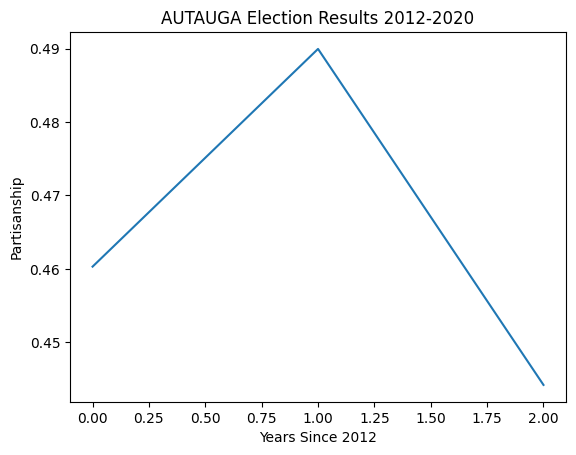

In [125]:
plot_county('AUTAUGA', 'ALABAMA')